# <center>Convolutional Neural Networks</center>
## <center>Inclass Project 4 - MA4144</center>

This project contains 5 tasks/questions to be completed, some require written answers. Open a markdown cell below the respective question that require written answers and provide (type) your answers. Questions that required written answers are given in blue fonts. Almost all written questions are open ended, they do not have a correct or wrong answer. You are free to give your opinions, but please provide related answers within the context.

After finishing project run the entire notebook once and **save the notebook as a pdf** (File menu -> Save and Export Notebook As -> PDF). You are **required to upload this PDF on moodle**.

***

## Outline of the project

The aim of the project is to practically learn and implement about CNN. This project will have two main sections.

Section 1: Build a convolutional layer and pooling layer from scratch. Then test them on a sample image.

Section 2: Use the Keras library to implement a CNN to classify images on the [CIFAR10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).

***


Use the below cell to use any include any imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from keras.preprocessing.image import load_img
import keras
from PIL import Image

## Section 1: Convolution and Pooling

**Q1** In the following cell, implement a method called create_padding. The method will take in input_image ($n \times m$) and will return a zero-padded image called output_image of dimension $(n + 2d) \times (m + 2d)$ where $d$ is the padding thickness on either side.

In [13]:
def create_padding(input_image, d):

    # Create a new image with the desired padding
    output_image = np.zeros((input_image.shape[0] + 2*d, input_image.shape[1] + 2*d))
    #place the original image in the center of the new image
    output_image[d:input_image.shape[0]+d, d:input_image.shape[1]+d] = input_image


    return output_image


**Q2** In the following cell, implement a method called convolution. The method will take in input_image ($n \times m$), kernel ($k \times k$) and will return output_image of dimension $(n - k + 1) \times (m - k + 1)$. The output_image is the result of the convolution between input_image and kernel. You may assume that the stride is $1$.

In [14]:
def convolution(input_image, kernel):

    # Define the dimensions
    kernel_height, kernel_width = kernel.shape
    #padded_image = create_padding(input_image, d=0)
    #print(padded_image)
     # Extract sliding windows (image patches) with the same shape as the kernel
    patches = np.lib.stride_tricks.sliding_window_view(input_image, (kernel_height, kernel_width))
    #print(patches.shape)
    # Reshape patches to ensure compatible shapes for einsum
    patches = patches.reshape(patches.shape[0], patches.shape[1], -1)
    #print(patches)
    # Flatten the kernel to match the reshaped patches
    flat_kernel = kernel.ravel()

    # Use einsum to perform element-wise multiplication and summing for convolution
    output_image = np.einsum('ijk,k->ij', patches, flat_kernel)
    #patches*flat_kernel)summation
    return output_image

In [15]:
# Test input image (3x3)
input_image = np.array([
    [1, 2, 0],
    [4, 5, 6],
    [7, 8, 9]
])

# Test kernel (2x2)
kernel = np.array([
    [1, 0],
    [0, -1]
])

# Perform the convolution
output_image = convolution(input_image, kernel)
print(output_image.shape)
print("Output Image:\n", output_image)

(2, 2)
Output Image:
 [[-4 -4]
 [-4 -4]]


**Q3** In the following cell, implement a method called pooling. The method will take in input_image ($n \times m$), $p$ the pooling dimension, pooling_type (either max_pooling or avg_pooling) and will return output_image of dimension $(n - p + 1) \times (m - p + 1)$. The output_image is the result of performing pooling on input_image by a window of dimension $p \times p$. You may assume that the stride is $1$.

In [16]:
def pooling(input_image, p, pooling_type = "max_pooling"):

    # Extract sliding windows (pooling patches)
    patches = np.lib.stride_tricks.sliding_window_view(input_image, (p, p))

    if pooling_type == "max_pooling":
        # Perform max pooling
        output_image = np.max(patches, axis=(2, 3))

    elif pooling_type == "avg_pooling":
        # Perform average pooling
        output_image = np.mean(patches, axis=(2, 3))

    else:
        print("Error: Invalid pooling type")
        return None

    return(output_image)


In [17]:
# Example usage:
input_image = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16]
])

# Perform max pooling with a window size of 2x2
max_pooled_output = pooling(input_image, p=2, pooling_type="max_pooling")
print(max_pooled_output.shape)
print("Max Pooled Output:\n", max_pooled_output)

# Perform average pooling with a window size of 2x2
avg_pooled_output = pooling(input_image, p=2, pooling_type="avg_pooling")
print("Average Pooled Output:\n", avg_pooled_output)


(3, 3)
Max Pooled Output:
 [[ 6  7  8]
 [10 11 12]
 [14 15 16]]
Average Pooled Output:
 [[ 3.5  4.5  5.5]
 [ 7.5  8.5  9.5]
 [11.5 12.5 13.5]]


The 'lena' image is widely used for image processing experiments and has been a benchmark image until recently.
We will use a $512 \times 512$ grayscale lena sample to test our convolution and pooling implementations.

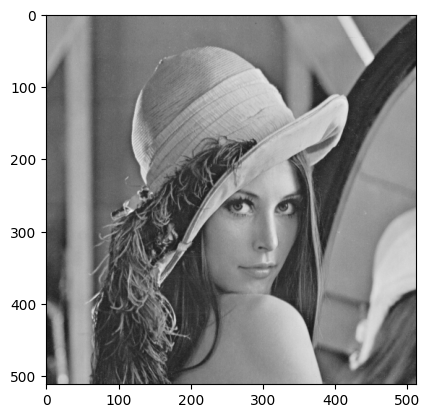

In [18]:
lena = load_img('/kaggle/input/lenadat/lena.gif')
plt.imshow(lena)
plt.show()

**Q4** In the following perform convolution on lena. Make sure you use padding appropriately to maintain the image size after convolution. However, pooling should be done on an unpadded image and image size may not be preseved after pooling. Use the following kernels to perform convolution separately.

1. $\begin{bmatrix} +1 & 0 & -1 \\ +1 & 0 & -1 \\ +1 & 0 & -1 \end{bmatrix}$
   
2. $\begin{bmatrix} -1 & -1 & -1 \\ 0 & 0 & 0 \\ +1 & +1 & +1 \end{bmatrix}$

3. $\begin{bmatrix} -1 & 0 & +1 \\ -2 & 0 & +2 \\ -1 & 0 & +1 \end{bmatrix}$

4. $\begin{bmatrix} +1 & +2 & +1 \\ 0 & 0 & 0 \\ -1 & -2 & -1 \end{bmatrix}$

5. Any other kernel that you may find interesting.

<font color='blue'>Explain what the above kernels (including your choice) will do to the image.</font>

<font color='green'>**Answer**

<font color='green'> 1.Detects edges in the horizontal direction (i.e., vertical edges).- Sobel X filter

<font color='green'> 2.Detects edges in the vertical direction (i.e., horizontal edges).- Sobel Y filter

<font color='green'> 3.Detects edges in all directions and emphasizes regions of rapid intensity change. It is effective for highlighting both vertical and horizontal edges and often produces a more pronounced effect than Sobel filters.

<font color='green'> 4.Used for edge detection, similar to the 1,2 but with a different weighting scheme. It highlights both vertical and horizontal edges but may produce slightly different results compared to above. It generally enhances edge features while reducing noise.

<font color='green'> 5.Using this will cause edges to stand out more prominently.Details will be enhanced.Textures within flat regions may become more visible. While it enhances details, it might also amplify noise, especially in low-contrast areas.

<font color='green'> 6.Blurs the image, reducing noise and detail. It smooths out the pixel intensity variations, which can be useful for preprocessing before edge detection.
</font>


In [19]:
# Convert the image to a numpy array
lena = np.array(lena)
print(lena.shape)


lena_image_pil = Image.open('/kaggle/input/lenadat/lena.gif')
lena_image = np.array(lena_image_pil.convert('L'))
print(lena_image.shape)

(512, 512, 3)
(512, 512)


In [20]:
kernels = {
    "Kernal 1: Sobel X": np.array([
        [1, 0, -1],
        [1, 0, -1],
        [1, 0, -1]
    ]),
    "Kernal 2: Sobel Y": np.array([
        [-1, -1, -1],
        [0, 0, 0],
        [1, 1, 1]
    ]),
    "Kernal 3": np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ]),
    "Kernal 4": np.array([
        [1, 2, 1],
        [0, 0, 0],
        [-1, -2, -1]
    ]),
    "Kernal 5": np.array([
        [0,1, 0],
        [1, -5, 1],
        [0, 1, 0]
    ]),
    "Gaussian Blur": np.array([
        [1, 2, 1],
        [2, 4, 2],
        [1, 2, 1]
    ]),
}


In [21]:
# Perform convolution for each kernel
output_images = convolution(lena_image, kernels["Kernal 1: Sobel X"]), convolution(lena_image, kernels["Kernal 2: Sobel Y"]), convolution(lena_image, kernels["Kernal 3"]), convolution(lena_image, kernels["Kernal 4"]), convolution(lena_image, kernels["Kernal 5"]), convolution(lena_image, kernels["Gaussian Blur"])


Show the resulting image after convolution and pooling separately on two subplots (of the same plot) for each kernel. There should be 5 plots with two sub plots in each.

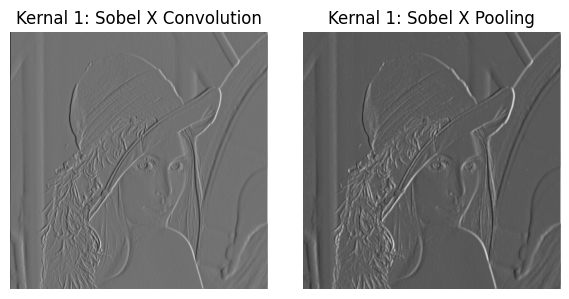

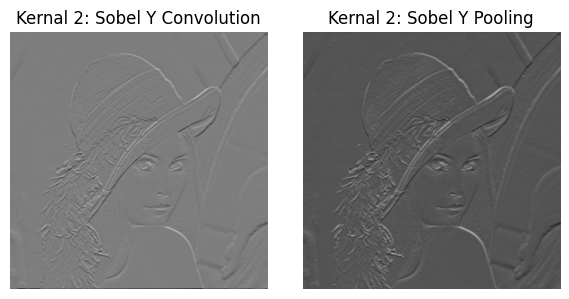

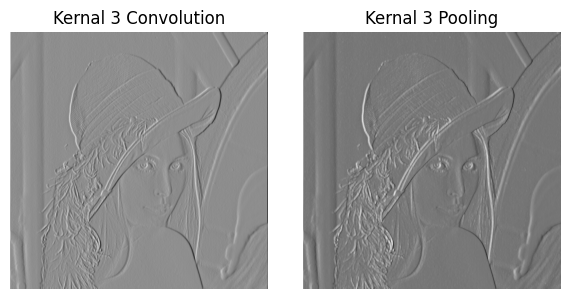

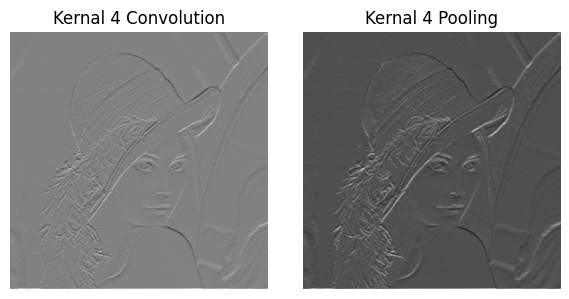

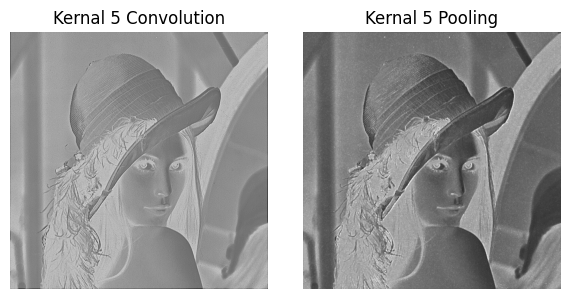

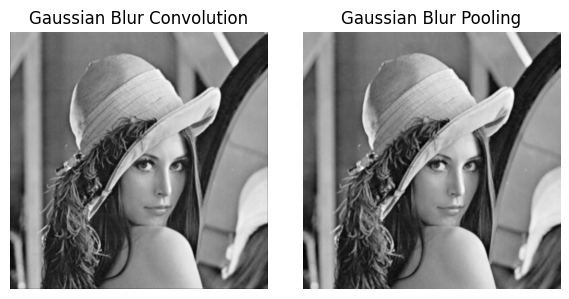

In [22]:
for i, (title, kernel) in enumerate(kernels.items()):

        #print(lena_image.shape)
        padded_image = create_padding(lena_image, d=1)
        #print(padded_image.shape)
        # Perform convolution
        output_image_conv = convolution(padded_image, kernel)
        #print(output_image_conv.shape)
        # 2x2 max pooling)
        output_image_pool = pooling(output_image_conv, p=2, pooling_type="max_pooling")
        #print(output_image_pool.shape)

        plt.figure(figsize=(6, 3))


        plt.subplot(1, 2, 1)
        plt.imshow(output_image_conv, cmap='gray')
        plt.title(f"{title} Convolution")
        plt.axis('off')

        # Subplot for pooling result
        plt.subplot(1, 2, 2)
        plt.imshow(output_image_pool, cmap='gray')
        plt.title(f"{title} Pooling")
        plt.axis('off')

        plt.tight_layout()
        plt.show()

<font color='blue'>Comment on the results of the above experiment. Mention whether you think the experiment was successful, and what your learnt from it.</font>

<font color='green'>**Answer**

<font color='green'>Yes, the experiment was a success. I learnt the how convolution and pooling extract image features, while preserving its spacial dimensions. As in example we did, some kernal extracts vertical features, horizontal feature, diagonal features and so on. Some kernals (Gaussian) smoothes the image, while some other sharpen the image features. Also, I observed how output image sizes vary with kernal sizes, strides, padding, and pooling sizes. Moreover, I learnt about the implementation of numpy einsum function for convolution and pooling operations. I observed how it breaks down the padded input immage into patches, then perform elementwise multiplication with flattened kernal and lastly get the rowwise sum of products, resulting in output convoluted image. The einsum function for max and average pooling was also observed and understood.






## Section 2: Using Keras to implement CNN for image classification

This section, unlike the previous projects you are granted full liberty to build the structure of your project appropriately using keras. I have provided only the code to download the cifar10 dataset. After using CNN on the dataset, provide the following. (Note that cifar10 contains rgb images with 3 channels unlike the grayscake image lena we used earlier.)

1. 5-fold cross validation accuracy.
2. Testing accuracy.
3. Confusion matrix of the result.
4. Precision recall for each class.

Note: You are required test on different hyperparameters and network architectures and select decide the best performer based on the cross-validation accuracy.

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.regularizers import l2
import keras
from sklearn.model_selection import KFold
import seaborn as sns
from tensorflow.keras.backend import clear_session
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


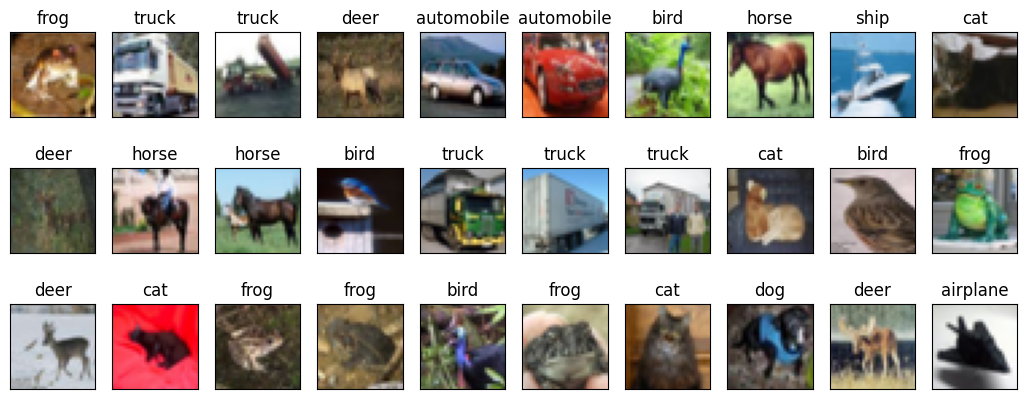

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Create a new figure
plt.figure(figsize=(13,5))

# Loop over the first 25 images
for i in range(30):
    # Create a subplot for each image
    plt.subplot(3, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Display the image
    plt.imshow(x_train[i])

    # Set the label as the title
    plt.title(class_names[y_train[i][0]], fontsize=12)

# Display the figure
plt.show()

In [6]:
#identify the unique classes in the dataset
unique_classes = np.unique(y_train)
print(len(unique_classes))
#there are 10 unique classes in the dataset

10


In [7]:
#one hot encode the target values
from keras.utils import to_categorical
# one hot encode target values
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
#preprocess the input data
def preprocess_input(x):
    #convert the pixel values to float
    x = x.astype('float32')


    #normalize the pixel values
    x_mean = np.mean(x)
    x_std = np.std(x)

    x = (x - x_mean) / x_std
    #resize the images to 32x32
    #x = np.array([np.array(Image.fromarray(image).resize((32, 32))) for image in x])

    return x



In [9]:


def define_model(architecture="baseline",learning_rate=0.0005):


    if architecture == "baseline":
        # VGG-style architecture with 2 blocks
        model = Sequential()
        model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
        model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(MaxPooling2D((2, 2)))

        model.add(Flatten())
        model.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))

        model.add(Dense(10, activation='softmax'))


    elif architecture == "vgg3block":
        # VGG-style architecture with 3 blocks
        # example of a 3-block vgg style architecture
        model = Sequential()
        model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
        model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(MaxPooling2D((2, 2)))

        model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(MaxPooling2D((2, 2)))

        model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(MaxPooling2D((2, 2)))

        model.add(Flatten())
        model.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))

        model.add(Dense(10, activation='softmax'))


    elif architecture == "with_dropout_0.2":
        model = Sequential()
        model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
        model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(MaxPooling2D((2, 2)))
        model.add(Dropout(0.2))
        model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(MaxPooling2D((2, 2)))
        model.add(Dropout(0.2))
        model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(MaxPooling2D((2, 2)))
        model.add(Dropout(0.2))
        model.add(Flatten())
        model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
        model.add(Dropout(0.2))
        model.add(Dense(10, activation='softmax'))


    elif architecture == "with_dropout_increasing":
        model = Sequential()
        model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
        model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(MaxPooling2D((2, 2)))
        model.add(Dropout(0.2))
        model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(MaxPooling2D((2, 2)))
        model.add(Dropout(0.3))
        model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(MaxPooling2D((2, 2)))
        model.add(Dropout(0.4))
        model.add(Flatten())
        model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
        model.add(Dropout(0.5))
        model.add(Dense(10, activation='softmax'))

    elif architecture == "custom":
        # Custom architecture
        model = Sequential()
        model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
        model.add(MaxPooling2D((2, 2)))


        model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
        model.add(MaxPooling2D((2, 2)))


        model.add(Flatten())
        model.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))

        model.add(Dense(10, activation='softmax'))
    elif architecture == "with_batch_norm":
        model = Sequential()
        model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
        model.add(BatchNormalization())
        model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D((2, 2)))
        model.add(Dropout(0.2))
        model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(BatchNormalization())
        model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D((2, 2)))
        model.add(Dropout(0.3))
        model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(BatchNormalization())
        model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D((2, 2)))
        model.add(Dropout(0.4))
        model.add(Flatten())
        model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
        model.add(Dense(10, activation='softmax'))


    else:
        raise ValueError("Architecture not recognized. Choose from 'vgg2block', 'vgg3block', 'alexnet', or 'custom'.")

    # Add the fully connected layers


    # Compile the model with Adam optimizer
    optimizer_instance = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer_instance, loss='categorical_crossentropy', metrics=['accuracy'])

    return model


In [10]:
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)

In [11]:
#evaluate the model

#perform 5 fold cross validation


def CrossVal_Training(archi,epochs,batch_size):
    # Original data (do not reassign within the loop)
    original_x_train, original_y_train = x_train, y_train
    # Initialize the KFold object with 5 splits
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # List to store accuracy for each fold
    fold_accuracies = []
    histories = []
    # Initialize an array to store predictions for each fold
    all_predictions = np.zeros((x_test.shape[0], 10))  # 10 classes for CIFAR-10
    # Perform 5-fold cross-validation
    for train_index, val_index in kf.split(x_train):
        clear_session()

        # Define and train the model for the current fold
        model = define_model(architecture=archi)
        history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_train[val_index], y_train[val_index]), verbose=1)
        histories.append(history)
        # Evaluate the model on the validation set
        val_loss, val_accuracy = model.evaluate(x_train[val_index], y_train[val_index], verbose=1)
        fold_accuracies.append(val_accuracy)
        print(f"Fold Validation Accuracy: {val_accuracy * 100:.2f}%")


    # Calculate and print the average accuracy across all folds
    average_accuracy = np.mean(fold_accuracies)
    print(f"\nAverage 5-Fold Cross-Validation Accuracy: {average_accuracy * 100:.2f}%")

    return model,histories


In [12]:
#evaluate on test set
def evaluate_on_test(model):

    model.fit(x_train, y_train, batch_size=64,epochs=10,verbose=1)


    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)

    print('\nTest Accuracy:', test_acc)
    print('Test Loss:    ', test_loss)

    return test_acc

In [13]:
def PlotDetails(histories):
    plt.figure(figsize=(15, 6))

    # Plot training and validation loss for each fold
    plt.subplot(1, 2, 1)
    for i, history in enumerate(histories):
        plt.plot(history.history['loss'], label=f'Fold {i+1} Train Loss', alpha=0.6)
        plt.plot(history.history['val_loss'], label=f'Fold {i+1} Val Loss', alpha=0.6)
    plt.legend()
    plt.title('Loss Evolution Across Folds')

    # Plot training and validation accuracy for each fold
    plt.subplot(1, 2, 2)
    for i, history in enumerate(histories):
        plt.plot(history.history['accuracy'], label=f'Fold {i+1} Train Accuracy', alpha=0.6)
        plt.plot(history.history['val_accuracy'], label=f'Fold {i+1} Val Accuracy', alpha=0.6)
    plt.legend()
    plt.title('Accuracy Evolution Across Folds')


In [58]:
model,histories= CrossVal_Training("baseline",10,64)



Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.3924 - loss: 1.7637 - val_accuracy: 0.6179 - val_loss: 1.1030
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6256 - loss: 1.0789 - val_accuracy: 0.6892 - val_loss: 0.8957
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6861 - loss: 0.9027 - val_accuracy: 0.7330 - val_loss: 0.7775
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7325 - loss: 0.7755 - val_accuracy: 0.7720 - val_loss: 0.6615
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7651 - loss: 0.6845 - val_accuracy: 0.8069 - val_loss: 0.5713
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7959 - loss: 0.6006 - val_accuracy: 0.8339 - val_loss: 0.5019
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8209 - loss: 0.5249 - val_accuracy: 0.8701 - val_loss: 0.4196
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8459 - loss: 0.4556 - val_accuracy: 0.

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9147 - loss: 0.2663
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9282 - loss: 0.2252
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9447 - loss: 0.1772
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9564 - loss: 0.1430
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9663 - loss: 0.1140
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9753 - loss: 0.0916
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9741 - loss: 0.0865
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9774 - loss: 0.0730
Epoch 9/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9804 - loss: 0.0657
Epoch 10/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9840 - loss: 0.0556
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6391 - loss: 2.5234

Test Accuracy: 0.6381999850273132
Test Loss:     2.511393547058

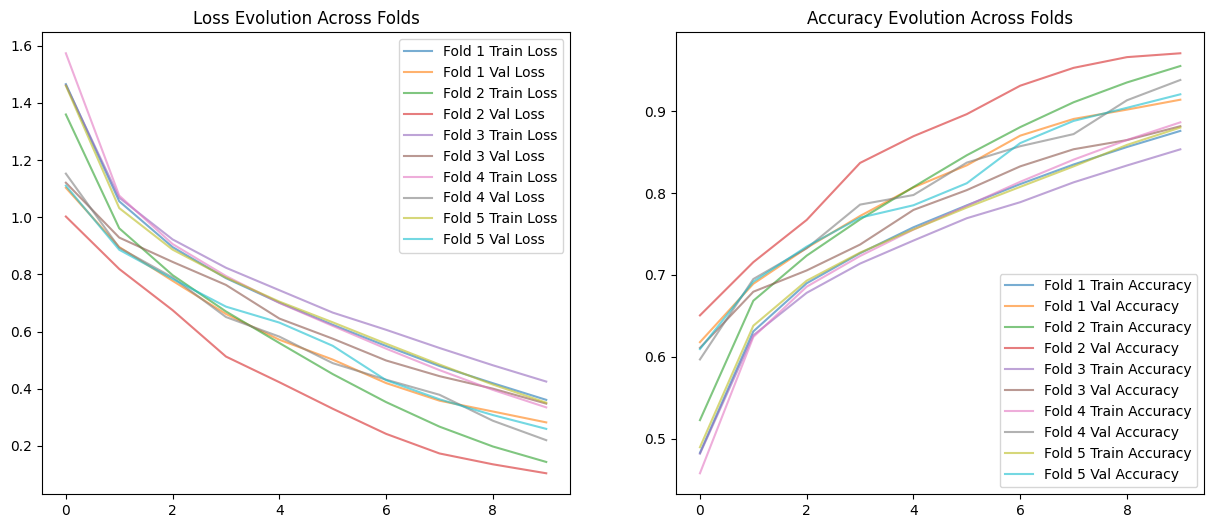

In [59]:
test_accuracy=evaluate_on_test(model)
PlotDetails(histories)


<font color='green'> With the baseline model, acheived an accuracy of 63.8%.

In [19]:

def plotConfusionMatrix(model,plotTrue=True):
    # Make predictions on the test set
    predictions = model.predict(x_test)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(y_test, axis=1)

    # Calculate the confusion matrix
    cm = confusion_matrix(true_classes, predicted_classes)
    if(plotTrue):
        # Plot the confusion matrix
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                    xticklabels=np.arange(10), yticklabels=np.arange(10))

        plt.title('Confusion Matrix')
        plt.xlabel('Predicted Class')
        plt.ylabel('True Class')
        plt.show()

    return true_classes,predicted_classes,cm

In [17]:


def GenerateClassificationReport(model):
    true_classes,predicted_classes,cm= plotConfusionMatrix(model,plotTrue=True)
    # Generate a classification report
    report = classification_report(true_classes, predicted_classes, target_names=[str(i) for i in range(10)])
    print(report)

    # Initialize lists to store precision and recall
    precision = []
    recall = []

    # Calculate precision and recall for each class
    for i in range(cm.shape[0]):
        tp = cm[i, i]  # True Positives
        fp = np.sum(cm[:, i]) - tp  # False Positives
        fn = np.sum(cm[i, :]) - tp  # False Negatives

        precision_class = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall_class = tp / (tp + fn) if (tp + fn) > 0 else 0

        precision.append(precision_class)
        recall.append(recall_class)

    # Print precision and recall for each class
    for i in range(len(precision)):
        print(f"Class {i}: Precision = {precision[i]:.2f}, Recall = {recall[i]:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


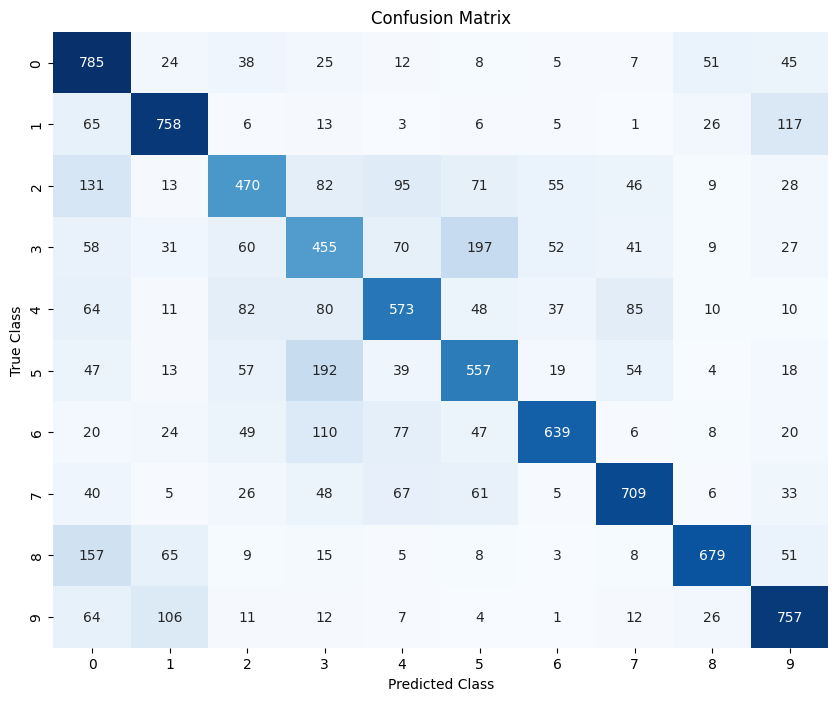

              precision    recall  f1-score   support

           0       0.55      0.79      0.65      1000
           1       0.72      0.76      0.74      1000
           2       0.58      0.47      0.52      1000
           3       0.44      0.46      0.45      1000
           4       0.60      0.57      0.59      1000
           5       0.55      0.56      0.56      1000
           6       0.78      0.64      0.70      1000
           7       0.73      0.71      0.72      1000
           8       0.82      0.68      0.74      1000
           9       0.68      0.76      0.72      1000

    accuracy                           0.64     10000
   macro avg       0.65      0.64      0.64     10000
weighted avg       0.65      0.64      0.64     10000

Class 0: Precision = 0.55, Recall = 0.79
Class 1: Precision = 0.72, Recall = 0.76
Class 2: Precision = 0.58, Recall = 0.47
Class 3: Precision = 0.44, Recall = 0.46
Class 4: Precision = 0.60, Recall = 0.57
Class 5: Precision = 0.55, Recall = 

In [60]:
GenerateClassificationReport(model)

Hyperparameter Tuning

In [42]:
import itertools
from tqdm import tqdm  # Import tqdm for progress bar

save_dir = '/saved_models/'
# Function to perform cross-validation manually
def cross_validate_model(x_train, y_train, params, n_splits=5):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = []

    # Log the start of cross-validation for the current parameter set
    print(f"Starting cross-validation with parameters: {params}")

    for train_index, val_index in tqdm(kfold.split(x_train, y_train), desc="Cross-validation folds", leave=False):
        x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        model = define_model(
            architecture=params['architecture'],
            learning_rate=params['learning_rate'],
        )
        model.fit(x_train_fold, y_train_fold, epochs=params['epochs'], batch_size=params['batch_size'], verbose=0)

        score = model.evaluate(x_val_fold, y_val_fold, verbose=0)
        scores.append(score[1])  # Append accuracy

    return np.mean(scores)

# Example parameter grid
param_grid = {
    'architecture': ['vgg3block','with_dropout_increasing','custom'],
    'batch_size': [64],
    'epochs': [10, 20],
    'learning_rate': [0.001, 0.0005]
}

# To track the best hyperparameters
best_mean_accuracy = 0
best_params = {}
save_model=None

# Generate combinations of hyperparameters
keys, values = zip(*param_grid.items())
param_combinations = [dict(zip(keys, v)) for v in itertools.product(*values)]

# Iterate over all parameter combinations
for params in param_combinations:
    mean_accuracy= cross_validate_model(x_train, y_train, params)
    print(f"Params: {params} -> Mean accuracy: {mean_accuracy:.2f}")

    # Check if this is the best model
    if mean_accuracy > best_mean_accuracy:
        best_mean_accuracy = mean_accuracy
        best_params = params
        save_model=model

save_model.save('/kaggle/working/last_best_model.h5')
# Print the best hyperparameters found
print(f"Best Hyperparameters: {best_params}")
print(f"Best Mean Accuracy: {best_mean_accuracy:.2f}")




Starting cross-validation with parameters: {'architecture': 'vgg3block', 'batch_size': 64, 'epochs': 10, 'learning_rate': 0.001}


Params: {'architecture': 'vgg3block', 'batch_size': 64, 'epochs': 10, 'learning_rate': 0.001} -> Mean accuracy: 0.74
Starting cross-validation with parameters: {'architecture': 'vgg3block', 'batch_size': 64, 'epochs': 10, 'learning_rate': 0.0005}


Params: {'architecture': 'vgg3block', 'batch_size': 64, 'epochs': 10, 'learning_rate': 0.0005} -> Mean accuracy: 0.73
Starting cross-validation with parameters: {'architecture': 'vgg3block', 'batch_size': 64, 'epochs': 20, 'learning_rate': 0.001}


Params: {'architecture': 'vgg3block', 'batch_size': 64, 'epochs': 20, 'learning_rate': 0.001} -> Mean accuracy: 0.74
Starting cross-validation with parameters: {'architecture': 'vgg3block', 'batch_size': 64, 'epochs': 20, 'learning_rate': 0.0005}


Params: {'architecture': 'vgg3block', 'batch_size': 64, 'epochs': 20, 'learning_rate': 0.0005} -> Mean accuracy: 0.73
Starting cross-validation with parameters: {'architecture': 'with_dropout_increasing', 'batch_size': 64, 'epochs': 10, 'learning_rate': 0.001}


Params: {'architecture': 'with_dropout_increasing', 'batch_size': 64, 'epochs': 10, 'learning_rate': 0.001} -> Mean accuracy: 0.75
Starting cross-validation with parameters: {'architecture': 'with_dropout_increasing', 'batch_size': 64, 'epochs': 10, 'learning_rate': 0.0005}


Params: {'architecture': 'with_dropout_increasing', 'batch_size': 64, 'epochs': 10, 'learning_rate': 0.0005} -> Mean accuracy: 0.75
Starting cross-validation with parameters: {'architecture': 'with_dropout_increasing', 'batch_size': 64, 'epochs': 20, 'learning_rate': 0.001}


Params: {'architecture': 'with_dropout_increasing', 'batch_size': 64, 'epochs': 20, 'learning_rate': 0.001} -> Mean accuracy: 0.79
Starting cross-validation with parameters: {'architecture': 'with_dropout_increasing', 'batch_size': 64, 'epochs': 20, 'learning_rate': 0.0005}


Params: {'architecture': 'with_dropout_increasing', 'batch_size': 64, 'epochs': 20, 'learning_rate': 0.0005} -> Mean accuracy: 0.80
Starting cross-validation with parameters: {'architecture': 'custom', 'batch_size': 64, 'epochs': 10, 'learning_rate': 0.001}


Params: {'architecture': 'custom', 'batch_size': 64, 'epochs': 10, 'learning_rate': 0.001} -> Mean accuracy: 0.70
Starting cross-validation with parameters: {'architecture': 'custom', 'batch_size': 64, 'epochs': 10, 'learning_rate': 0.0005}


Params: {'architecture': 'custom', 'batch_size': 64, 'epochs': 10, 'learning_rate': 0.0005} -> Mean accuracy: 0.71
Starting cross-validation with parameters: {'architecture': 'custom', 'batch_size': 64, 'epochs': 20, 'learning_rate': 0.001}


Params: {'architecture': 'custom', 'batch_size': 64, 'epochs': 20, 'learning_rate': 0.001} -> Mean accuracy: 0.69
Starting cross-validation with parameters: {'architecture': 'custom', 'batch_size': 64, 'epochs': 20, 'learning_rate': 0.0005}


Params: {'architecture': 'custom', 'batch_size': 64, 'epochs': 20, 'learning_rate': 0.0005} -> Mean accuracy: 0.70
Best Hyperparameters: {'architecture': 'with_dropout_increasing', 'batch_size': 64, 'epochs': 20, 'learning_rate': 0.0005}
Best Mean Accuracy: 0.80


In [45]:

evaluate_on_test(save_model)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9888 - loss: 0.0332
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9905 - loss: 0.0307
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9917 - loss: 0.0261
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9926 - loss: 0.0227
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9927 - loss: 0.0222
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9893 - loss: 0.0310
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9935 - loss: 0.0227
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9924 - loss: 0.0237
Epoch 9/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9935 - loss: 0.0215
Epoch 10/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9942 - loss: 0.0179
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6320 - loss: 4.8893

Test Accuracy: 0.6276000142097473
Test Loss:     4.984678745269

0.6276000142097473

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


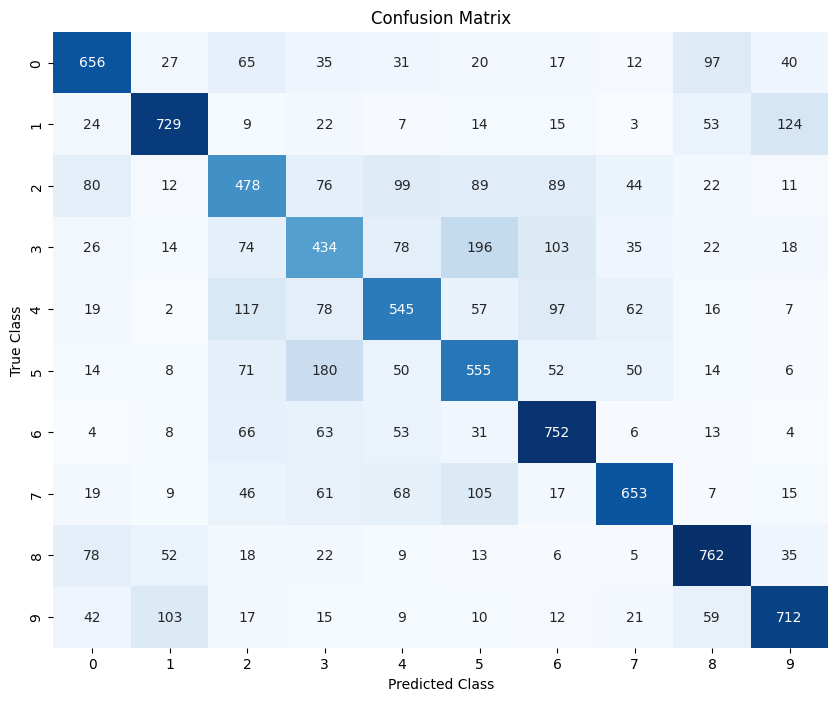

              precision    recall  f1-score   support

           0       0.68      0.66      0.67      1000
           1       0.76      0.73      0.74      1000
           2       0.50      0.48      0.49      1000
           3       0.44      0.43      0.44      1000
           4       0.57      0.55      0.56      1000
           5       0.51      0.56      0.53      1000
           6       0.65      0.75      0.70      1000
           7       0.73      0.65      0.69      1000
           8       0.72      0.76      0.74      1000
           9       0.73      0.71      0.72      1000

    accuracy                           0.63     10000
   macro avg       0.63      0.63      0.63     10000
weighted avg       0.63      0.63      0.63     10000

Class 0: Precision = 0.68, Recall = 0.66
Class 1: Precision = 0.76, Recall = 0.73
Class 2: Precision = 0.50, Recall = 0.48
Class 3: Precision = 0.44, Recall = 0.43
Class 4: Precision = 0.57, Recall = 0.55
Class 5: Precision = 0.51, Recall = 

In [54]:
GenerateClassificationReport(save_model)




<font color='green'> from the above parameter tuning, we didn't receive a good enough accuracy, therefore we select our best hyperparameter set and conduct training for more epochs and more network architectures.

<font color='green'>Best Hyperparameters: {'architecture': 'with_dropout_increasing', 'batch_size': 64, 'epochs': 20, 'learning_rate': 0.0005}

In [62]:
model1,histories= CrossVal_Training("with_dropout_increasing",50,64)



Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.2177 - loss: 2.1992 - val_accuracy: 0.4668 - val_loss: 1.4478
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4417 - loss: 1.5235 - val_accuracy: 0.5657 - val_loss: 1.1957
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5360 - loss: 1.2896 - val_accuracy: 0.6480 - val_loss: 0.9969
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6032 - loss: 1.1283 - val_accuracy: 0.6749 - val_loss: 0.9161
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6416 - loss: 1.0202 - val_accuracy: 0.7207 - val_loss: 0.7846
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6761 - loss: 0.9244 - val_accuracy: 0.7547 - val_loss: 0.6840
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6963 - loss: 0.8717 - val_accuracy: 0.7600 - val_loss: 0.6785
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7121 - loss: 0.8276 - val_accuracy: 

In [63]:
evaluate_on_test(model1)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8817 - loss: 0.3409
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8768 - loss: 0.3483
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8840 - loss: 0.3355
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8815 - loss: 0.3364
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8828 - loss: 0.3355
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8869 - loss: 0.3259
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8838 - loss: 0.3315
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8879 - loss: 0.3189
Epoch 9/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8886 - loss: 0.3198
Epoch 10/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8901 - loss: 0.3140
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8432 - loss: 0.5352

Test Accuracy: 0.8382999897003174
Test Loss:     0.540939986705

0.8382999897003174

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


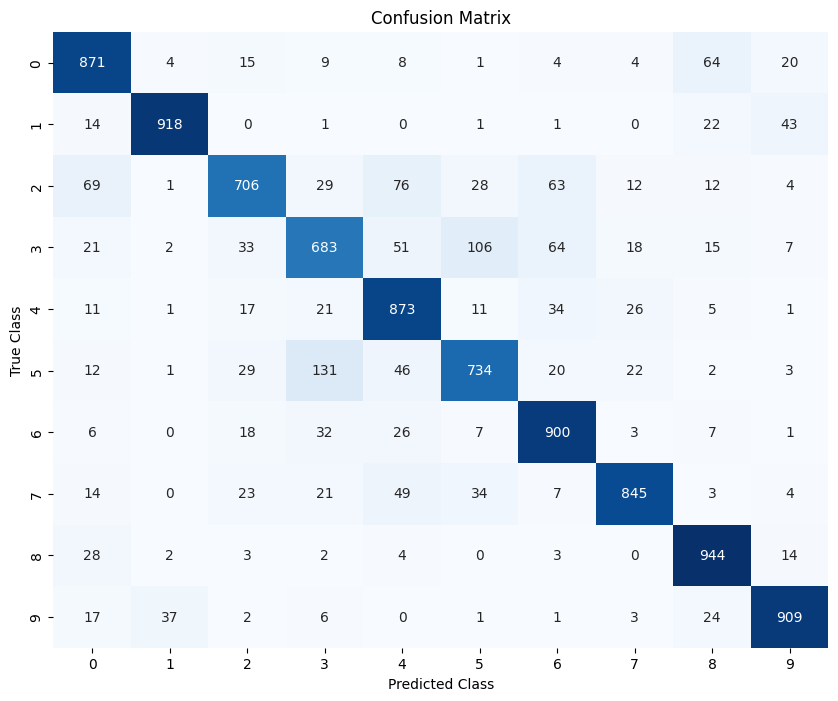

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1000
           1       0.95      0.92      0.93      1000
           2       0.83      0.71      0.76      1000
           3       0.73      0.68      0.71      1000
           4       0.77      0.87      0.82      1000
           5       0.80      0.73      0.76      1000
           6       0.82      0.90      0.86      1000
           7       0.91      0.84      0.87      1000
           8       0.86      0.94      0.90      1000
           9       0.90      0.91      0.91      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

Class 0: Precision = 0.82, Recall = 0.87
Class 1: Precision = 0.95, Recall = 0.92
Class 2: Precision = 0.83, Recall = 0.71
Class 3: Precision = 0.73, Recall = 0.68
Class 4: Precision = 0.77, Recall = 0.87
Class 5: Precision = 0.80, Recall = 

In [64]:
GenerateClassificationReport(model1)




<font color='green'> Training it for 50 epochs gave us an accuracy of 83.8%

In [73]:
#save model1 and download
model1.save('/kaggle/working/model1.h5') 
!zip -r /kaggle/working/model1.zip /kaggle/working/model1.h5

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


  adding: kaggle/working/model1.h5 (deflated 9%)


In [14]:
model4,histories= CrossVal_Training("with_dropout_increasing",100,64)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100


I0000 00:00:1730095480.317605      78 service.cc:145] XLA service 0x7c91c40072a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730095480.317659      78 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 31/782 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1000 - loss: 4.6740  

I0000 00:00:1730095487.795047      78 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.2085 - loss: 2.2869 - val_accuracy: 0.4319 - val_loss: 1.5662
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4306 - loss: 1.5462 - val_accuracy: 0.5524 - val_loss: 1.2162
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5198 - loss: 1.3242 - val_accuracy: 0.6422 - val_loss: 0.9877
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5905 - loss: 1.1472 - val_accuracy: 0.6859 - val_loss: 0.8666
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6395 - loss: 1.0215 - val_accuracy: 0.7228 - val_loss: 0.7795
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6805 - loss: 0.9284 - val_accuracy: 0.7454 - val_loss: 0.7067
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7002 - loss: 0.8620 - val_accuracy: 0.7795 - val_loss: 0.6388
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7149 - loss: 0.8211 - val_accuracy: 0.79

In [15]:
evaluate_on_test(model4)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9094 - loss: 0.2593
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9161 - loss: 0.2425
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9135 - loss: 0.2497
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9107 - loss: 0.2504
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9125 - loss: 0.2525
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9145 - loss: 0.2462
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9134 - loss: 0.2514
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9133 - loss: 0.2517
Epoch 9/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9136 - loss: 0.2517
Epoch 10/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9141 - loss: 0.2489
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8484 - loss: 0.5952

Test Accuracy: 0.8454999923706055
Test Loss:     0.598388552665

0.8454999923706055

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


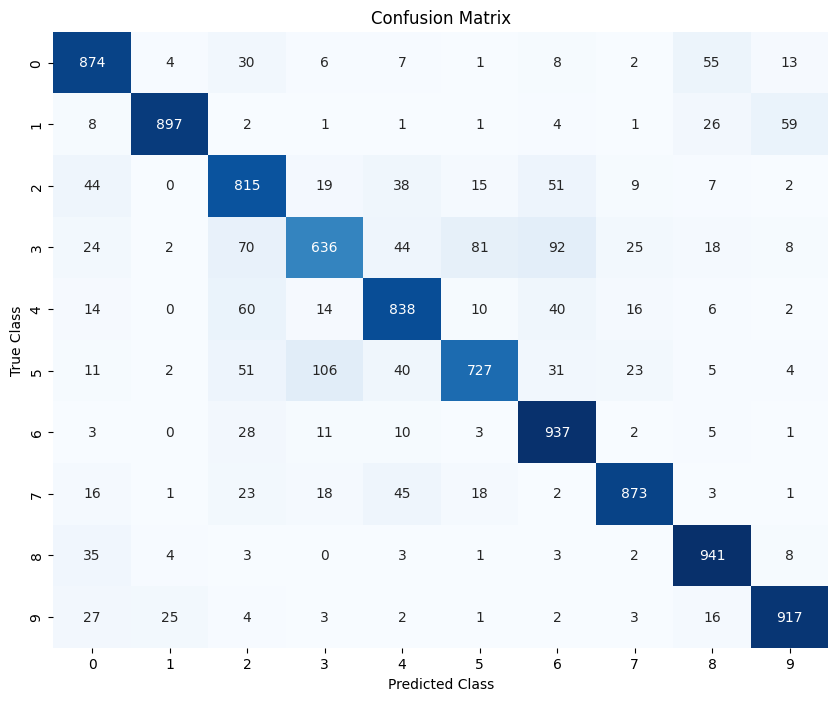

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1000
           1       0.96      0.90      0.93      1000
           2       0.75      0.81      0.78      1000
           3       0.78      0.64      0.70      1000
           4       0.82      0.84      0.83      1000
           5       0.85      0.73      0.78      1000
           6       0.80      0.94      0.86      1000
           7       0.91      0.87      0.89      1000
           8       0.87      0.94      0.90      1000
           9       0.90      0.92      0.91      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.84     10000
weighted avg       0.85      0.85      0.84     10000

Class 0: Precision = 0.83, Recall = 0.87
Class 1: Precision = 0.96, Recall = 0.90
Class 2: Precision = 0.75, Recall = 0.81
Class 3: Precision = 0.78, Recall = 0.64
Class 4: Precision = 0.82, Recall = 0.84
Class 5: Precision = 0.85, Recall = 

In [20]:
GenerateClassificationReport(model4)

<font color='green'> With it being trained for 100 epochs, the accuracy has improved a little giving it an overalltesting accuracy of 84.5%

<font color='green'> Now we train the model with new architecture which includes batch normalization in every block along with dropout.

In [21]:
model2,histories= CrossVal_Training("with_batch_norm",100,64) 

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 17ms/step - accuracy: 0.3068 - loss: 2.2413 - val_accuracy: 0.5316 - val_loss: 1.3282
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5157 - loss: 1.3581 - val_accuracy: 0.6083 - val_loss: 1.0900
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6087 - loss: 1.1009 - val_accuracy: 0.6998 - val_loss: 0.8449
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6558 - loss: 0.9747 - val_accuracy: 0.7385 - val_loss: 0.7305
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6960 - loss: 0.8685 - val_accuracy: 0.7779 - val_loss: 0.6315
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7239 - loss: 0.7900 - val_accuracy: 0.7863 - val_loss: 0.6051
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7435 - loss: 0.7309 - val_accuracy: 0.8149 - val_loss: 0.5250
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7657 - loss: 0.6746 - val_ac

In [22]:
evaluate_on_test(model2)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9533 - loss: 0.1372
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9528 - loss: 0.1384
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9566 - loss: 0.1249
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9553 - loss: 0.1282
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9527 - loss: 0.1336
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9548 - loss: 0.1301
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9555 - loss: 0.1284
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9554 - loss: 0.1276
Epoch 9/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9545 - loss: 0.1291
Epoch 10/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9563 - loss: 0.1257
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8772 - loss: 0.4612

Test Accuracy: 0.8748999834060669
Test Loss:     0.466768950223

0.8748999834060669

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


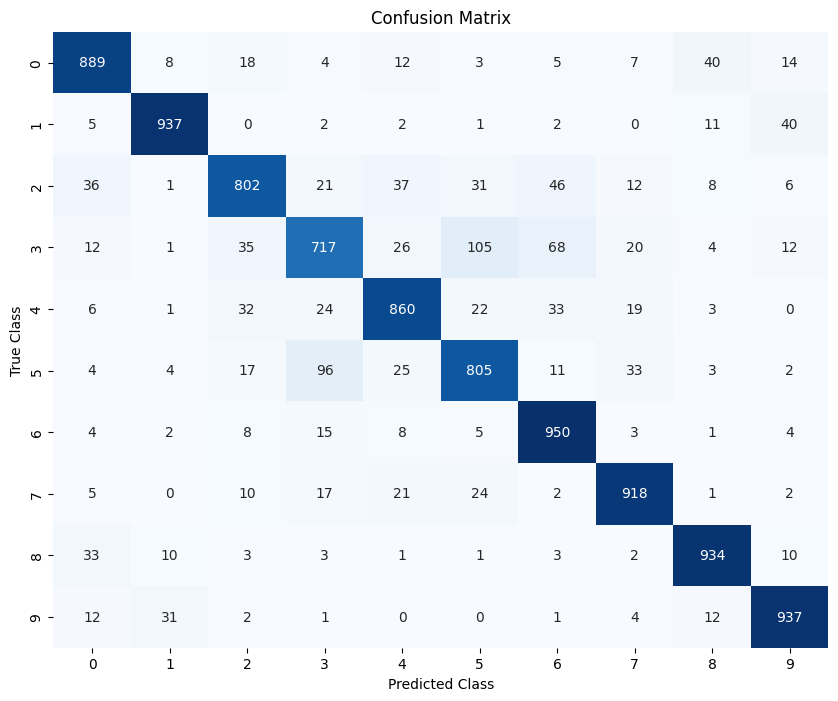

              precision    recall  f1-score   support

           0       0.88      0.89      0.89      1000
           1       0.94      0.94      0.94      1000
           2       0.87      0.80      0.83      1000
           3       0.80      0.72      0.75      1000
           4       0.87      0.86      0.86      1000
           5       0.81      0.81      0.81      1000
           6       0.85      0.95      0.90      1000
           7       0.90      0.92      0.91      1000
           8       0.92      0.93      0.93      1000
           9       0.91      0.94      0.92      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

Class 0: Precision = 0.88, Recall = 0.89
Class 1: Precision = 0.94, Recall = 0.94
Class 2: Precision = 0.87, Recall = 0.80
Class 3: Precision = 0.80, Recall = 0.72
Class 4: Precision = 0.87, Recall = 0.86
Class 5: Precision = 0.81, Recall = 

In [23]:
GenerateClassificationReport(model2)

<font color='green'> Recieved the highest accuracy so far of 87.48%. 

In [25]:
#save model1 and download
model2.save('/kaggle/working/model2.h5') 
!zip -r /kaggle/working/model1.zip /kaggle/working/model2.h5

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


  adding: kaggle/working/model2.h5 (deflated 10%)


Testing on a random image from internet

In [30]:
import cv2
image = cv2.imread('/kaggle/input/shiptest/ship.jpeg')
# Convert the image from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

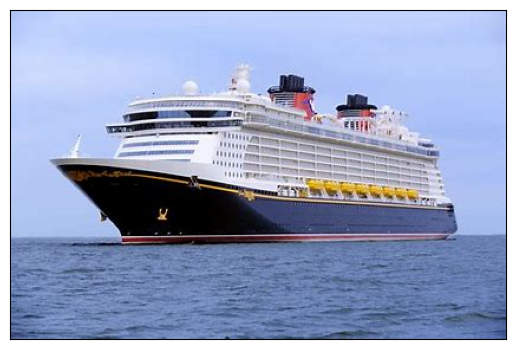

In [31]:
# Display the image
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

In [32]:
# Resize it to 32x32 pixels
image = cv2.resize(image, (32,32))
image = preprocess_input(image)

image = image.reshape((1, 32, 32, 3))
# Make a prediction
prediction = model2.predict(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step


In [33]:
predicted_class = prediction.argmax()

print('Predicted class: ', class_names[predicted_class])

Predicted class:  ship


<font color='blue'>Comment on the results of the above experiment, including which classes were difficult to classify and your opinion. Mention whether you think the experiment was successful, and what your learnt from it.</font>

<font color='green'> **Answer**

We chose the last model (**model2**) as the best model since it achieved the highest testing accuracy of **87.48%**. According to the confusion matrix and classification reports, **Class 3** appears to be the most challenging class to predict accurately.

| Class | Precision | Recall | F1 Score | Support |
|-------|-----------|--------|----------|---------|
| 3     | 0.80      | 0.72   | 0.75     | 1000    |

The lower recall of 0.72 indicates that the model has a higher number of **False Negatives** or fewer **True Positives** for this class.


<font color='green'> I think the experiment was successful, as the model achieved average **Precision**, **Recall**, and **F1** scores of **0.87**, with most classes scoring above **0.8**.

| Metric       | Precision | Recall | F1 Score | Support |
|--------------|-----------|--------|----------|---------|
| Macro Avg    | 0.87      | 0.87   | 0.87     | 10000   |
| Weighted Avg | 0.87      | 0.87   | 0.87     | 10000   |


<font color= 'green'>I have learnt how K-fold Cross Validation works, how to evaluate model performance using evaluation matrices like Confusion matrix, Precision, Recall and F1 score. I learnt to spot class-specific weaknesses despite high overall accuracy. I learnt about different model architectures, which yields better results by self experimenting. Learnt about dropout regularization, and about batch normalization to durther improve the model's performance.